In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier

In [3]:
# Loading Dataset
df_p3=pd.read_csv("bankruptcy_prevention.csv",sep = ';',encoding='latin1',header = 0)
df_p3

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# EDA

In [4]:
df_p3.head(5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [66]:
value_counts = df_p3["class_new"].value_counts()
value_counts

1    143
0    107
Name: class_new, dtype: int64

In [5]:
df_p3.tail(5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [6]:
df_p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [7]:
df_p3.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_p3.shape

(250, 7)

In [9]:
df_p3.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [10]:
#labelencoder = LabelEncoder()
#df_p3.iloc[:, -1] = labelencoder.fit_transform(df_p3.iloc[:,-1])
#creating variable to store dataset
new_df = df_p3.iloc[:,:]
new_df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [11]:
#Creating new column for class
new_df["class_new"] = 1
new_df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_new
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [12]:
#Converting class_new values to zero where bankruptcy is there
new_df.loc[new_df[' class'] == 'bankruptcy', 'class_new'] = 0

In [13]:
new_df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_new
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [14]:
#Dropping the class column
new_df.drop(' class', inplace = True, axis =1)
new_df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_new
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


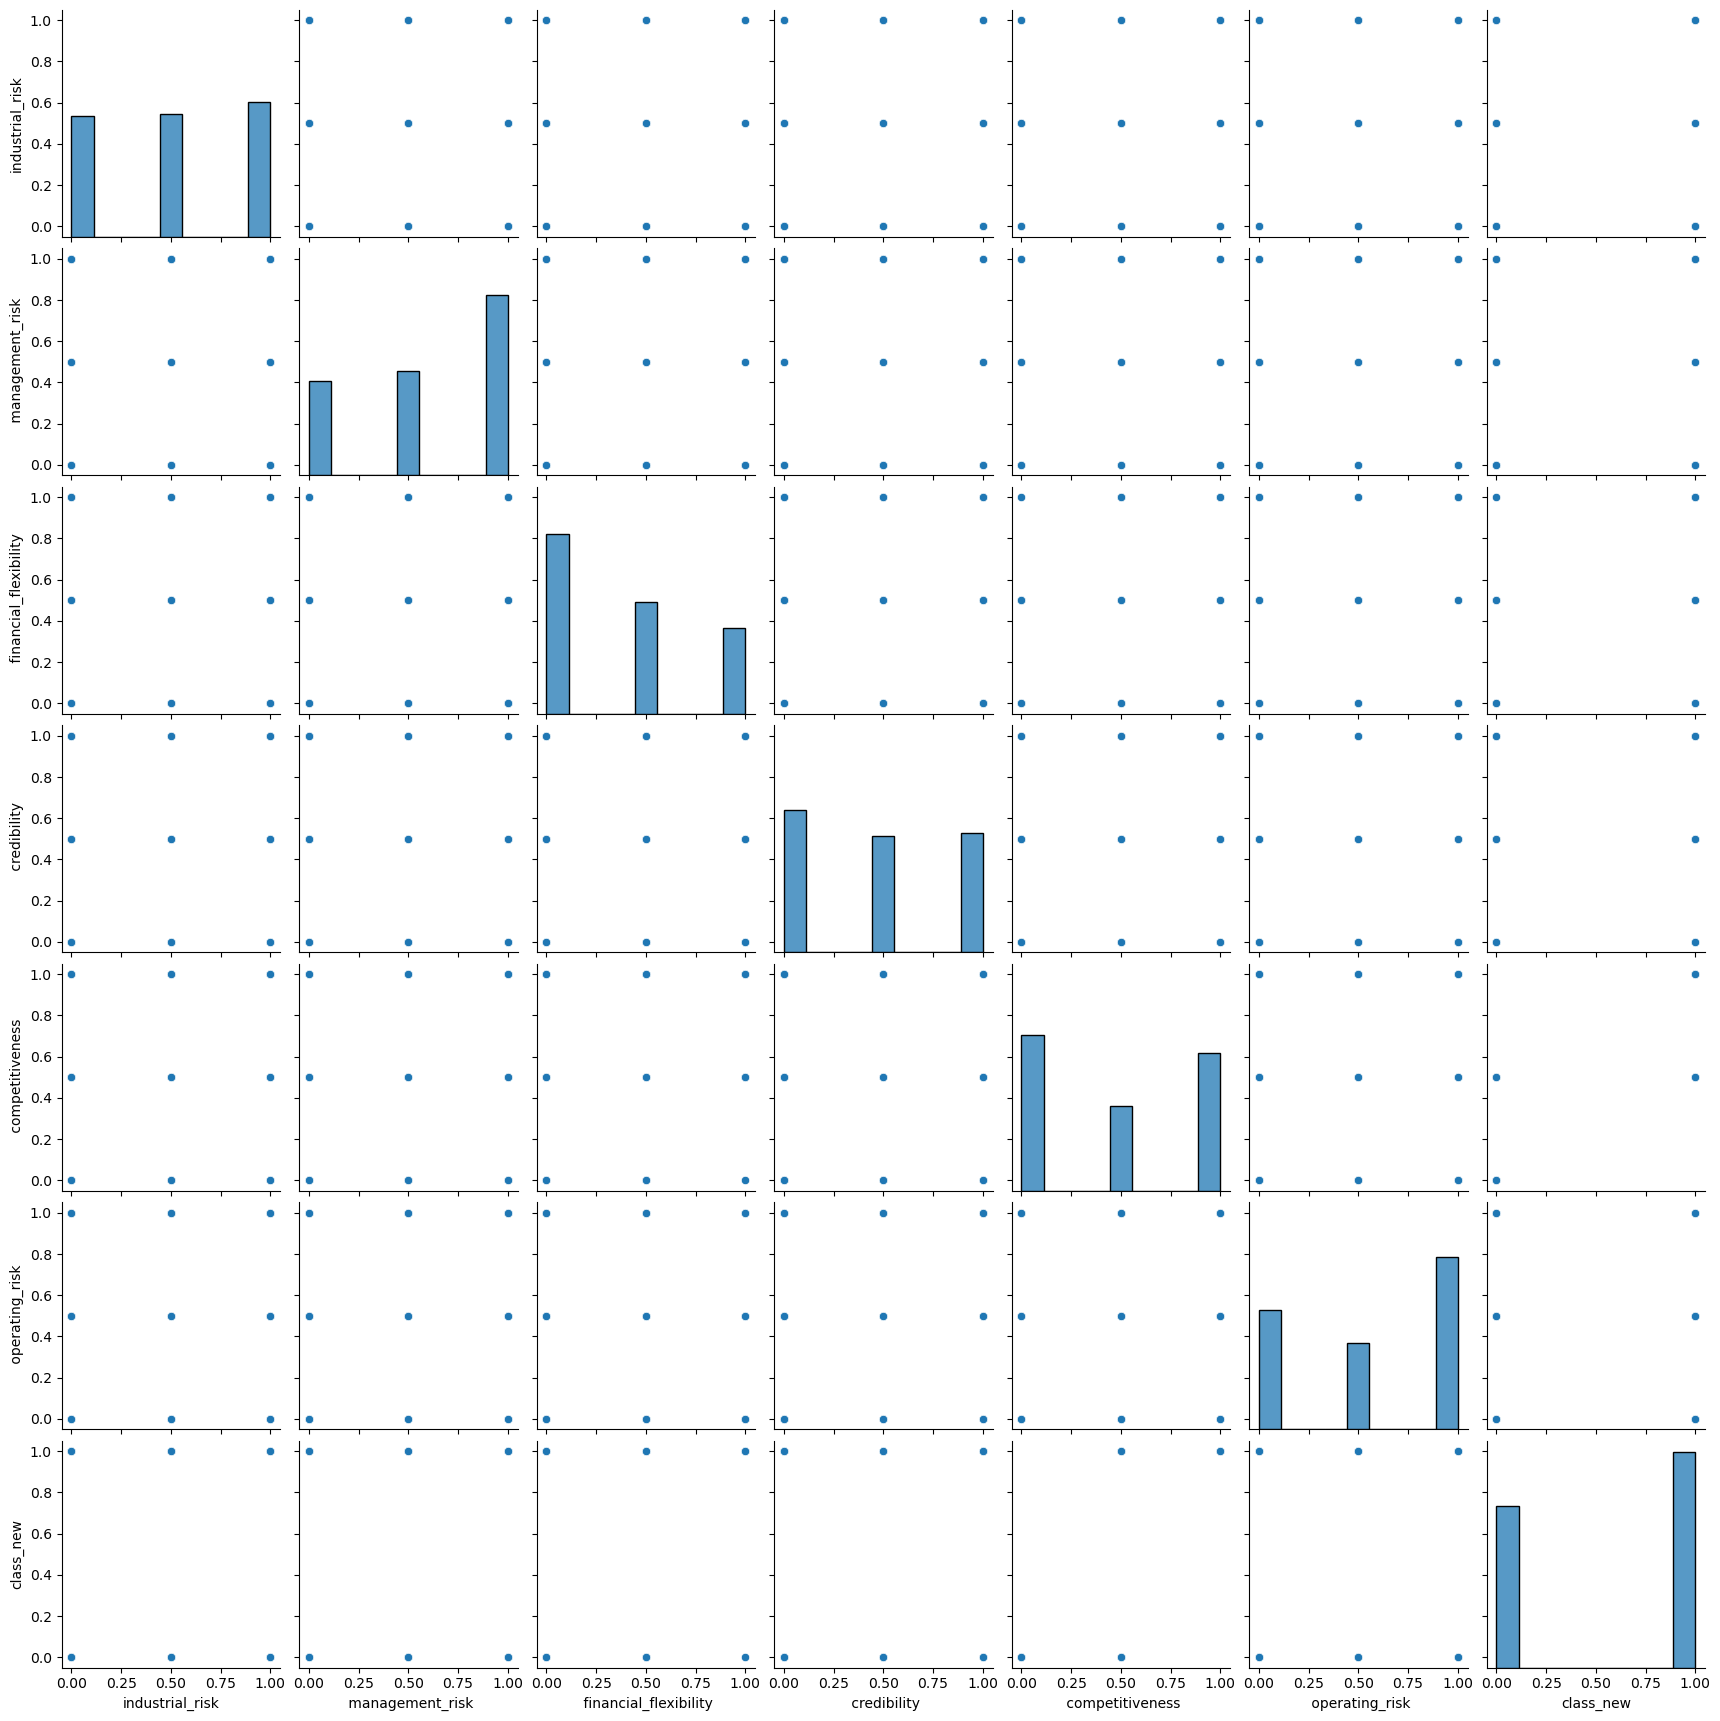

In [15]:
# Create the default pairplot
sns.pairplot(new_df)

In [16]:
#Correlation od data
new_df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_new
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_new,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


In [17]:
#Heatmap for correlation of data
sns.heatmap(new_df.corr(), annot = True)

<AxesSubplot:>

In [18]:
# Count of data in class

sns.countplot(x = 'class_new', data = new_df, palette = 'hls')

<AxesSubplot:xlabel='class_new', ylabel='count'>

In [19]:
sns.countplot(x =' financial_flexibility', data =new_df, palette = 'hls')

<AxesSubplot:xlabel=' financial_flexibility', ylabel='count'>

In [20]:
sns.countplot(x =' management_risk', data =new_df, palette = 'hls')

<AxesSubplot:xlabel=' management_risk', ylabel='count'>

In [21]:
sns.countplot(x =' credibility', data =new_df, palette = 'hls')

<AxesSubplot:xlabel=' credibility', ylabel='count'>

In [22]:
sns.countplot(x =' competitiveness', data =new_df, palette = 'hls')

<AxesSubplot:xlabel=' competitiveness', ylabel='count'>

In [23]:
sns.countplot(x =' operating_risk', data =new_df, palette = 'hls')

<AxesSubplot:xlabel=' operating_risk', ylabel='count'>

In [24]:
# Removing outliers using Isdolation Forest

In [25]:
# training the model
clf = IsolationForest(random_state=15,contamination=.015)
clf.fit(new_df)
y_pred_outliers = clf.predict(new_df)
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [26]:
#new_df['scores']=clf.decision_function(new_df)
new_df['Outliers']=clf.predict(new_df.iloc[:,0:7])
new_df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_new,Outliers
0,0.5,1.0,0.0,0.0,0.0,0.5,0,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1,1


In [27]:
#print the Outliers
new_df[new_df['Outliers']==-1]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_new,Outliers
36,1.0,1.0,0.0,1.0,0.0,0.0,0,-1
72,1.0,0.5,1.0,0.5,0.0,0.0,0,-1
142,0.0,1.0,1.0,1.0,0.5,1.0,1,-1
192,0.5,1.0,0.0,0.0,1.0,0.0,1,-1


In [28]:
new_df = new_df.drop(new_df.index[[36, 72,142, 192]], axis=0)
new_df.reset_index(drop=True,inplace = True)
new_df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_new,Outliers
0,0.5,1.0,0.0,0.0,0.0,0.5,0,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...
241,0.0,1.0,1.0,1.0,1.0,1.0,1,1
242,1.0,1.0,0.5,1.0,1.0,0.0,1,1
243,0.0,1.0,1.0,0.5,0.5,0.0,1,1
244,1.0,0.0,0.5,1.0,0.5,0.0,1,1


In [29]:
x =new_df.iloc[:,:-2]
# Target variable
y =new_df['class_new']
x

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
241,0.0,1.0,1.0,1.0,1.0,1.0
242,1.0,1.0,0.5,1.0,1.0,0.0
243,0.0,1.0,1.0,0.5,0.5,0.0
244,1.0,0.0,0.5,1.0,0.5,0.0


In [30]:
y

0      0
1      0
2      0
3      0
4      0
      ..
241    1
242    1
243    1
244    1
245    1
Name: class_new, Length: 246, dtype: int64

In [31]:
#Sliptting the data into train and test

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)


In [33]:
# Creating a Model by
#1 Logistic Regression

from sklearn.linear_model import LogisticRegression  
  
LR= LogisticRegression()  
LR.fit(x_train,y_train)  

LogisticRegression()

In [34]:
pred_lr=LR.predict(x_test)  
LR.score(x_test, y_test) 

1.0

In [35]:
print(classification_report(y_test, pred_lr))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        40

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [36]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, pred_lr))

Confusion Matrix:
 [[22  0]
 [ 0 40]]


In [37]:
# 2 Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier  

DT = DecisionTreeClassifier()  
DT.fit(x_train, y_train)  

DecisionTreeClassifier()

In [38]:
pred_DT = DT.predict(x_test)  
DT.score(x_test, y_test)  

0.9838709677419355

In [39]:
print(classification_report(y_test, pred_DT))  

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.97      0.99        40

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62



In [40]:
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_DT))

Confusion Matrix:
 [[22  0]
 [ 1 39]]


In [41]:
# 3 Gradient Booster
from sklearn.ensemble import GradientBoostingClassifier  
  
GBC = GradientBoostingClassifier(random_state=42)  
GBC.fit(x_train, y_train)  


GradientBoostingClassifier(random_state=42)

In [42]:
pred_gbc= GBC.predict(x_test)  
GBC.score(x_test, y_test) 

0.9838709677419355

In [43]:
print(classification_report(y_test, pred_gbc))  

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.97      0.99        40

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62



In [44]:
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_gbc))

Confusion Matrix:
 [[22  0]
 [ 1 39]]


In [45]:
# 4 Random Forest
from sklearn.ensemble import RandomForestClassifier  
  
RFC= RandomForestClassifier(random_state=0)  
RFC.fit(x_train, y_train)  

RandomForestClassifier(random_state=0)

In [46]:
pred_rfc= RFC.predict(x_test)  
RFC.score(x_test, y_test)  

1.0

In [47]:
print(classification_report(y_test, pred_rfc))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        40

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [48]:
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_rfc))

Confusion Matrix:
 [[22  0]
 [ 0 40]]


In [49]:
# 5 Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train,y_train)
ypred = nb.predict(x_test)
ypred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [50]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.98      1.00      0.99        40

    accuracy                           0.98        62
   macro avg       0.99      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62



In [51]:
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred))

Confusion Matrix:
 [[21  1]
 [ 0 40]]


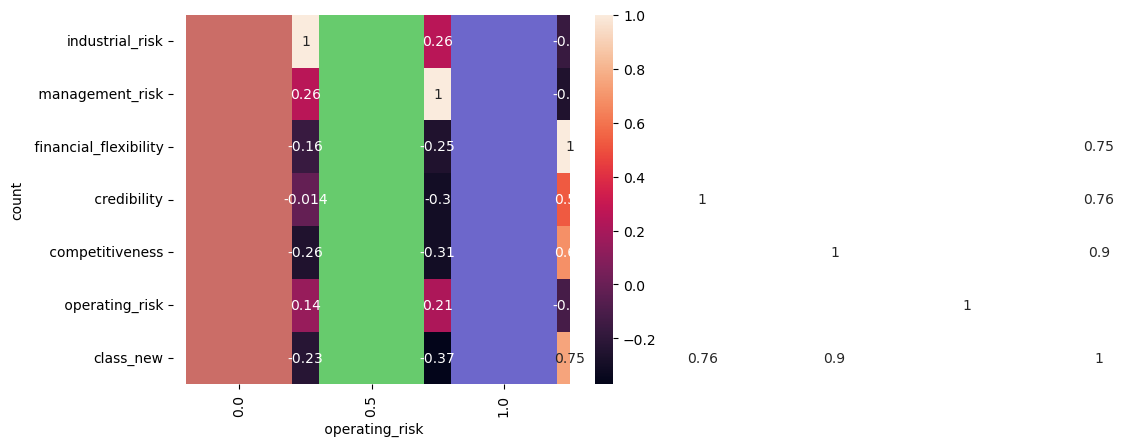

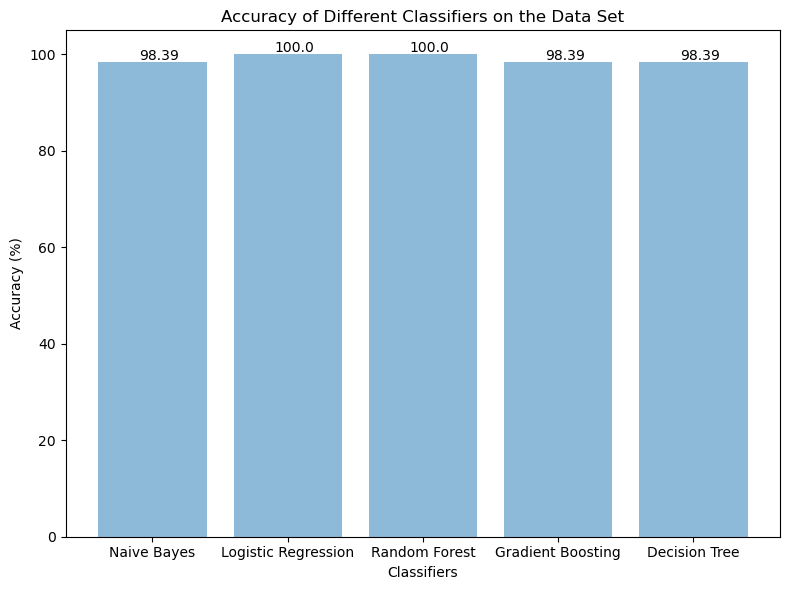

In [52]:
# Calculate the accuracy for each classifier
accuracy_nb = round(accuracy_score(y_test, ypred)*100,2)
accuracy_lr = round(accuracy_score(y_test, pred_lr)*100,2)
accuracy_rf = round(accuracy_score(y_test, pred_rfc)*100,2)
accuracy_gbc = round(accuracy_score(y_test, pred_gbc)*100,2)
accuracy_dt = round(accuracy_score(y_test, pred_DT)*100,2)



# Create a bar plot for the accuracy of each classifier
classifiers = ['Naive Bayes', 'Logistic Regression', 'Random Forest','Gradient Boosting','Decision Tree']
accuracy = [accuracy_nb, accuracy_lr, accuracy_rf, accuracy_gbc,accuracy_dt]

y_pos = np.arange(len(classifiers))

plt.figure(figsize=(8,6))
plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, classifiers)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Classifiers on the Data Set')
plt.tight_layout()

# Add labels for the bars
for i in range(len(accuracy)):
    plt.text(x=i-0.1, y=accuracy[i]+0.5, s=str(accuracy[i]))

plt.show()

In [67]:
import numpy as np

# Define the output_label function
def output_label(n):
    if n == 0:
        return "Bankruptcy"
    elif n == 1:
        return "Non Bankruptcy"

# Define the manual_testing function
def manual_testing(industrial_risk, management_risk, financial_flexibility, credibility, competitiveness, operating_risk):
    new_xv_test = np.array([[float(industrial_risk), float(management_risk), float(financial_flexibility), float(credibility), float(competitiveness), float(operating_risk)]])
    
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_NB = nb.predict(new_xv_test)

    print("\n\nLR Prediction: {}\nDT Prediction: {}\nGBC Prediction: {}\nRFC Prediction: {}\nNB Prediction: {}".format(
        output_label(pred_LR[0]),
        output_label(pred_DT[0]),
        output_label(pred_DT[0]),
        output_label(pred_GBC[0]),
        output_label(pred_RFC[0]),
        output_label(pred_NB[0])
    ))


industrial_risk = str(input())  
management_risk	 = str(input())
financial_flexibility=str(input())
credibility=str(input())
competitiveness=str(input())
operating_risk=str(input())
manual_testing(industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk)  



1
1
1
1
1
1


LR Prediction: Non Bankruptcy
DT Prediction: Non Bankruptcy
GBC Prediction: Non Bankruptcy
RFC Prediction: Non Bankruptcy
NB Prediction: Non Bankruptcy


In [70]:
!pip install joblib

from sklearn.ensemble import RandomForestClassifier
import joblib

# Create and train the RandomForestClassifier model
RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_train, y_train)

# Specify the file path where you want to save the model
model_filename = "random_forest_model.pkl"

# Save the model to the specified file
joblib.dump(RFC, model_filename)


['random_forest_model.pkl']